## CNN実装の簡単な練習
- 手書き文字の認識

#### データベースの設定

In [1]:
# Karasのデータセットのimportと読み込み
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

この時点で
  - _images...各画像
  - _labels.....画像に1対1に対応したラベル

が格納されている

#### データの確認

In [2]:
# 学習データの次元数の表示
print(train_images.ndim)

# 学習データの画像を格納した配列のサイズの表示
print(train_images.shape)

# 学習データの型を表示
print(train_images.dtype)

3
(60000, 28, 28)
uint8


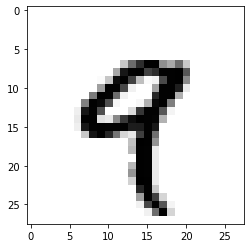

In [3]:
# 学習データの5番目のデータを表示
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
# 学習データのサイズの表示
print(len(train_labels))

# 学習データのラベルの表示
print(train_labels)

60000
[5 0 4 ... 5 6 8]


In [5]:
# 学習データと同様にテストデータに対しても実施
print(test_images.shape)

print(len(test_labels))

print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


#### データの正規化

In [6]:
# データのバッチ処理を行ったのちに ０〜２５５ > 0〜1 に正規化
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#### クラスラベルのエンコード

In [7]:
# 学習できるようにラベルを one-hot vector に変換
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### CNNアーキテクチャの構築

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

# オブジェクト作成
model = models.Sequential()

# 第一引数...フィルタの種類とサイズ
# 第二引数...活性化関数
# 第三引数...入力テンソルの次元数
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
# アーキテクチャの確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 全結合層（Dense層）の追加
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# 最終的なアーキテクチャの確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

#### DNNの学習に必要な項目の選択

In [12]:
# 損失関数/パラメータの更新方法/評価関数
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### DNNの学習の実行

In [13]:
# DNNの学習の実行（学習状況をhistoryオブジェクトに保存）
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 35s 4ms/step - loss: 0.1854 - accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0474 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0219 - accuracy: 0.9928


#### 学習結果のプロット

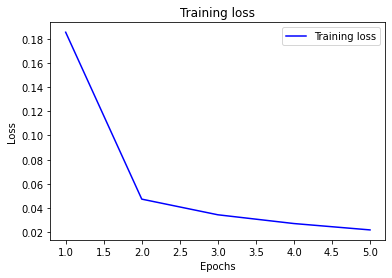

In [14]:
# 学習データの損失のプロット
import matplotlib.pyplot as plt

# 学習時のhistoryから読み出し
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

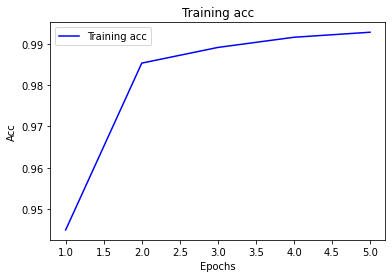

In [15]:
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [16]:
# 学習済みのモデルでテストデータを認識・精度評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9927
0.9926999807357788
